In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# === 1. Load Dataset ===
# Ganti 'data.csv' dengan nama file dataset kamu
df = pd.read_csv("../Data/time-domain-cancer.csv")

# Fitur dan label
X = df[["SDNN", "RMSSD", "pNN50"]]
y = df['Class']   # pastikan kolom target bernama 'label'

# === 2. Split Data ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === 3. Normalisasi (Standardisasi) ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# === 4. Model Logistic Regression ===
log_reg = LogisticRegression(
    solver='liblinear',       # cocok untuk dataset kecil
    class_weight='balanced',  # opsional bila dataset tidak seimbang
    random_state=42
)
log_reg.fit(X_train_scaled, y_train)

# === 5. Evaluasi ===
y_pred = log_reg.predict(X_test_scaled)

print("Akurasi :", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# === 6. Koefisien Model ===
coef_df = pd.DataFrame({
    'Feature': ["SDNN", "RMSSD", "pNN50"],
    'Coefficient': log_reg.coef_[0]
})
print("\nKoefisien Logistic Regression:\n", coef_df)
print("Intercept :", log_reg.intercept_[0])


Akurasi : 0.5

Confusion Matrix:
 [[3 1]
 [3 1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.75      0.60         4
           1       0.50      0.25      0.33         4

    accuracy                           0.50         8
   macro avg       0.50      0.50      0.47         8
weighted avg       0.50      0.50      0.47         8


Koefisien Logistic Regression:
   Feature  Coefficient
0    SDNN    -0.198701
1   RMSSD    -0.075633
2   pNN50    -0.107490
Intercept : -0.00019337631805838322


Time Domain

Preview dataset:
   SDNN  RMSSD  pNN50  Class
0    54     19      1      1
1   158     36     15      1
2   129     24      4      1
3    62     13      0      1
4   101     18      1      1

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   SDNN    37 non-null     int64
 1   RMSSD   37 non-null     int64
 2   pNN50   37 non-null     int64
 3   Class   37 non-null     int64
dtypes: int64(4)
memory usage: 1.3 KB
None
Akurasi: 0.375

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.50      0.44         4
           1       0.33      0.25      0.29         4

    accuracy                           0.38         8
   macro avg       0.37      0.38      0.37         8
weighted avg       0.37      0.38      0.37         8



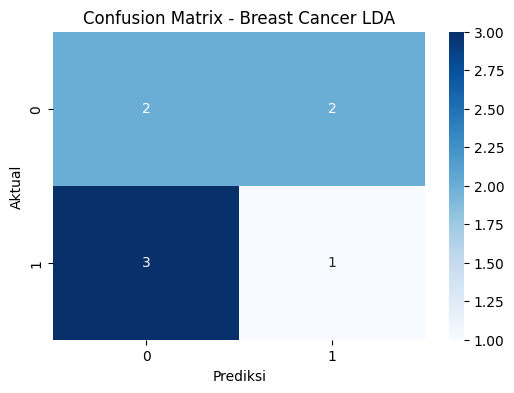

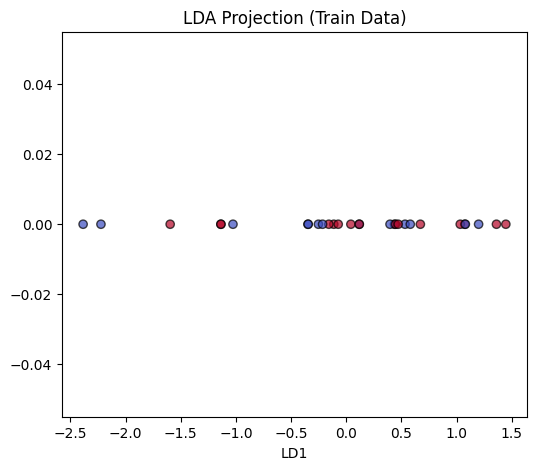

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
df = pd.read_csv("../Data/time-domain-cancer.csv")

print("Preview dataset:")
print(df.head())
print("\nInfo:")
print(df.info())

# 2. Pisahkan fitur (X) dan label (y)
# Ganti 'diagnosis' sesuai dengan nama kolom target di dataset kamu
X = df[["SDNN", "RMSSD", "pNN50"]]  # Fitur asli
y = df["Class"]                     # Label

# Jika target berupa string (misal: 'M' / 'B'), ubah ke angka
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)
    print("Mapping kelas:", dict(zip(le.classes_, le.transform(le.classes_))))

# 3. Split data train & test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Buat model LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# 6. Prediksi
y_pred = lda.predict(X_test)

# 7. Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - Breast Cancer LDA")
plt.show()

# 8. Visualisasi hasil LDA
X_lda = lda.transform(X_train)
plt.figure(figsize=(6,5))
plt.scatter(X_lda[:,0], np.zeros_like(X_lda[:,0]), c=y_train, cmap="coolwarm", edgecolors="k", alpha=0.7)
plt.title("LDA Projection (Train Data)")
plt.xlabel("LD1")
plt.show()


Freq Domain

Preview dataset:
      LF     HF  LF/HF Ratio  Class
0   80.0   58.0     1.379310      1
1  245.0  200.0     1.225000      1
2  443.0  168.0     2.636905      1
3   58.0   31.0     1.870968      1
4  154.7   45.5     3.400000      1

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LF           37 non-null     float64
 1   HF           37 non-null     float64
 2   LF/HF Ratio  37 non-null     float64
 3   Class        37 non-null     int64  
dtypes: float64(3), int64(1)
memory usage: 1.3 KB
None
Akurasi: 0.375

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.25      0.29         4
           1       0.40      0.50      0.44         4

    accuracy                           0.38         8
   macro avg       0.37      0.38      0.37         8
weighted avg       0.37      0.38      

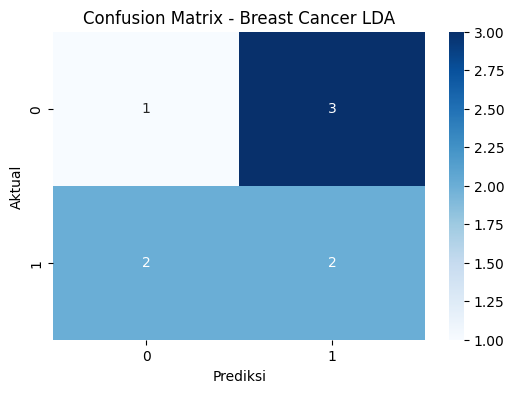

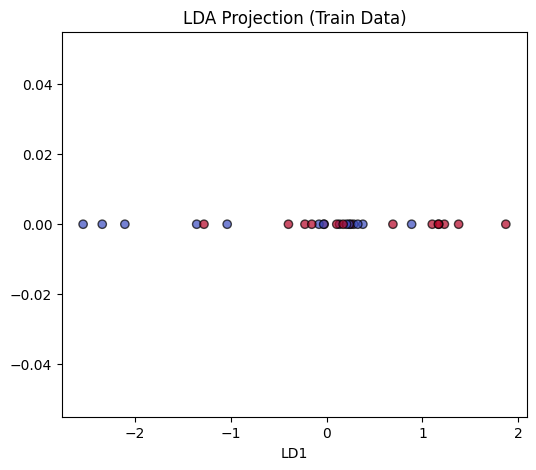

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
df = pd.read_csv("../Data/freq-domain-cancer.csv")

print("Preview dataset:")
print(df.head())
print("\nInfo:")
print(df.info())

# 2. Pisahkan fitur (X) dan label (y)
# Ganti 'diagnosis' sesuai dengan nama kolom target di dataset kamu
X = df[["LF", "HF", "LF/HF Ratio"]]  # Fitur asli
y = df["Class"]                     # Label

# Jika target berupa string (misal: 'M' / 'B'), ubah ke angka
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)
    print("Mapping kelas:", dict(zip(le.classes_, le.transform(le.classes_))))

# 3. Split data train & test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Buat model LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# 6. Prediksi
y_pred = lda.predict(X_test)

# 7. Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - Breast Cancer LDA")
plt.show()

# 8. Visualisasi hasil LDA
X_lda = lda.transform(X_train)
plt.figure(figsize=(6,5))
plt.scatter(X_lda[:,0], np.zeros_like(X_lda[:,0]), c=y_train, cmap="coolwarm", edgecolors="k", alpha=0.7)
plt.title("LDA Projection (Train Data)")
plt.xlabel("LD1")
plt.show()


Combine

Preview dataset:
           LF          HF  LF/HF Ratio        SDNN      rMSSD      pNN50  \
0   80.013983   58.024189     1.377027   53.984200  18.993204   1.000051   
1  244.992243  200.004850     1.210870  158.009489  36.013534  15.012213   
2  442.991760  168.013509     2.644242  128.982592  24.007157   4.016765   
3   58.006826   30.999638     1.887505   61.998060  13.001501  -0.014558   
4  154.700141   45.493972     3.403379  100.995673  18.000678   0.994859   

   Class  
0      1  
1      1  
2      1  
3      1  
4      1  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LF           380 non-null    float64
 1   HF           380 non-null    float64
 2   LF/HF Ratio  380 non-null    float64
 3   SDNN         380 non-null    float64
 4   rMSSD        380 non-null    float64
 5   pNN50        380 non-null    float64
 6   Class   

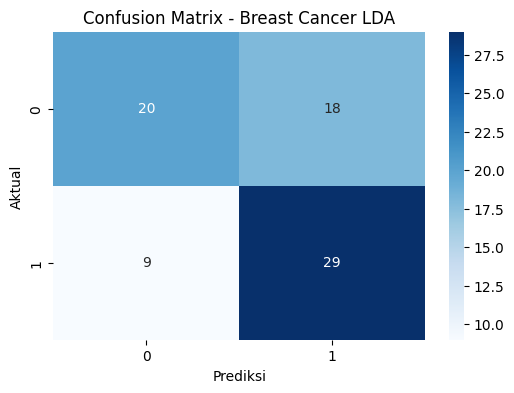

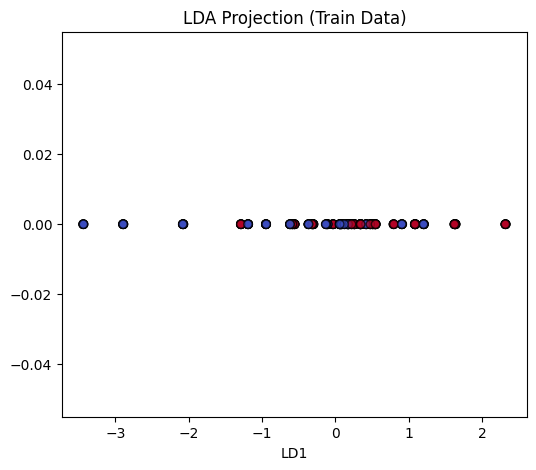

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
df = pd.read_csv("../FeatureEngineer/breast-cancer-dataset-augmented.csv")

print("Preview dataset:")
print(df.head())
print("\nInfo:")
print(df.info())

# 2. Pisahkan fitur (X) dan label (y)
# Ganti 'diagnosis' sesuai dengan nama kolom target di dataset kamu
X = df[["LF", "HF", "LF/HF Ratio", "SDNN", "rMSSD", "pNN50"]]  # Fitur asli
y = df["Class"]                     # Label

# Jika target berupa string (misal: 'M' / 'B'), ubah ke angka
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)
    print("Mapping kelas:", dict(zip(le.classes_, le.transform(le.classes_))))

# 3. Split data train & test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Buat model LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# 6. Prediksi
y_pred = lda.predict(X_test)

# 7. Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - Breast Cancer LDA")
plt.show()

# 8. Visualisasi hasil LDA
X_lda = lda.transform(X_train)
plt.figure(figsize=(6,5))
plt.scatter(X_lda[:,0], np.zeros_like(X_lda[:,0]), c=y_train, cmap="coolwarm", edgecolors="k", alpha=0.7)
plt.title("LDA Projection (Train Data)")
plt.xlabel("LD1")
plt.show()
